## Fast Food Marketing Campain A/B Test


### Scenario

A fast-food chain plans to add a new item to its menu. However, they are still undecided between three possible marketing campaigns for promoting the new product. In order to determine which promotion has the greatest effect on sales, the new item is introduced at locations in several randomly selected markets. A different promotion is used at each location, and the weekly sales of the new item are recorded for the first four weeks.

### Goal

Evaluate A/B testing results and decide which marketing strategy works the best.

In [1]:
import pandas as pd

In [34]:
df=pd.read_csv('./data/WA_Marketing-Campaign.csv')

In [44]:
df


,MarketID,MarketSize,LocationID,AgeOfStore,Promotion,week,SalesInThousands
0,1,Medium,1,4,3,1,33.73
1,1,Medium,1,4,3,2,35.67
2,1,Medium,1,4,3,3,29.03
3,1,Medium,1,4,3,4,39.25
4,1,Medium,2,5,2,1,27.81
...,...,...,...,...,...,...,...
543,10,Large,919,2,1,4,64.34
544,10,Large,920,14,2,1,50.20
545,10,Large,920,14,2,2,45.75
546,10,Large,920,14,2,3,44.29


In [37]:
df.columns

Index(['MarketID', 'MarketSize', 'LocationID', 'AgeOfStore', 'Promotion',
       'week', 'SalesInThousands'],
      dtype='object')

In [38]:
df.isnull().sum()


MarketID            0
MarketSize          0
LocationID          0
AgeOfStore          0
Promotion           0
week                0
SalesInThousands    0
dtype: int64

In [39]:
df.dtypes

MarketID              int64
MarketSize           object
LocationID            int64
AgeOfStore            int64
Promotion             int64
week                  int64
SalesInThousands    float64
dtype: object

In [50]:
df_=df['Promotion']
df_

0      3
1      3
2      3
3      3
4      2
      ..
543    1
544    2
545    2
546    2
547    2
Name: Promotion, Length: 548, dtype: int64

In [41]:
# Filter data based on promotions
promotion1 = df[df['Promotion'] == 3]
promotion2 = df[df['Promotion'] == 2]
promotion3=

In [42]:
promotion1

,MarketID,MarketSize,LocationID,AgeOfStore,Promotion,week,SalesInThousands
0,1,Medium,1,4,3,1,33.73
1,1,Medium,1,4,3,2,35.67
2,1,Medium,1,4,3,3,29.03
3,1,Medium,1,4,3,4,39.25
20,1,Medium,6,10,3,1,32.90
...,...,...,...,...,...,...,...
487,10,Large,905,2,3,4,58.33
532,10,Large,917,14,3,1,53.50
533,10,Large,917,14,3,2,56.34
534,10,Large,917,14,3,3,51.83


In [43]:
promotion2

,MarketID,MarketSize,LocationID,AgeOfStore,Promotion,week,SalesInThousands
4,1,Medium,2,5,2,1,27.81
5,1,Medium,2,5,2,2,34.67
6,1,Medium,2,5,2,3,27.98
7,1,Medium,2,5,2,4,27.72
12,1,Medium,4,1,2,1,39.28
...,...,...,...,...,...,...,...
531,10,Large,916,7,2,4,49.71
544,10,Large,920,14,2,1,50.20
545,10,Large,920,14,2,2,45.75
546,10,Large,920,14,2,3,44.29


In [51]:
# Separate control and variant groups based on 'Promotion'
control_group = df[df['Promotion'] == 1]['SalesInThousands']
variant_group = df[df['Promotion'].isin([2, 3, 4])]['SalesInThousands']

In [52]:
from scipy.stats import ttest_ind

# Perform t-test
t_stat, p_value = ttest_ind(control_group, variant_group, equal_var=False)

# Print results
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Determine significance level (e.g., alpha = 0.05)
alpha = 0.05
if p_value < alpha:
    print("Reject null hypothesis: There is a significant difference in sales between groups.")
else:
    print("Fail to reject null hypothesis: There is no significant difference in sales between groups.")


T-statistic: 4.440810345179236
P-value: 1.2247858038453887e-05
Reject null hypothesis: There is a significant difference in sales between groups.


### Given that there is a significant difference in sales between the control and variant groups, now:

### Analyze Further to compare further

#### Examine which specific promotions (2, 3, or 4) are driving the difference, will do this by performing individual t-tests or other statistical analyses between the control group and each variant group.

In [53]:
for promo in [2, 3, 4]:
    variant_group = df[df['Promotion'] == promo]['SalesInThousands']
    t_stat, p_value = ttest_ind(control_group, variant_group)
    print(f"Promotion {promo}: T-statistic: {t_stat}, P-value: {p_value}")


Promotion 2: T-statistic: 6.453671702181005, P-value: 3.5506696512134566e-10
Promotion 3: T-statistic: 1.5551383687293547, P-value: 0.12079667272313273
Promotion 4: T-statistic: nan, P-value: nan


### Detailed Analysis & Visualisation

T-statistic: 4.4524805205130935
P-value: 1.0297684996307772e-05
Reject null hypothesis: True
Mean sales for Control Group: 58.09901162790698
Mean sales for Variant Group 2: 47.32941489361701
Mean sales for Variant Group 3: 55.36446808510639
Mean sales for Variant Group 4: nan


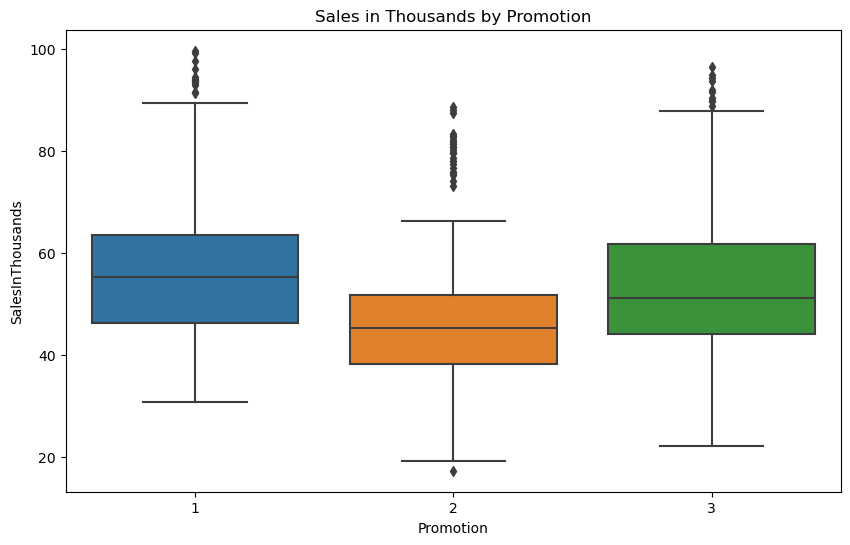

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


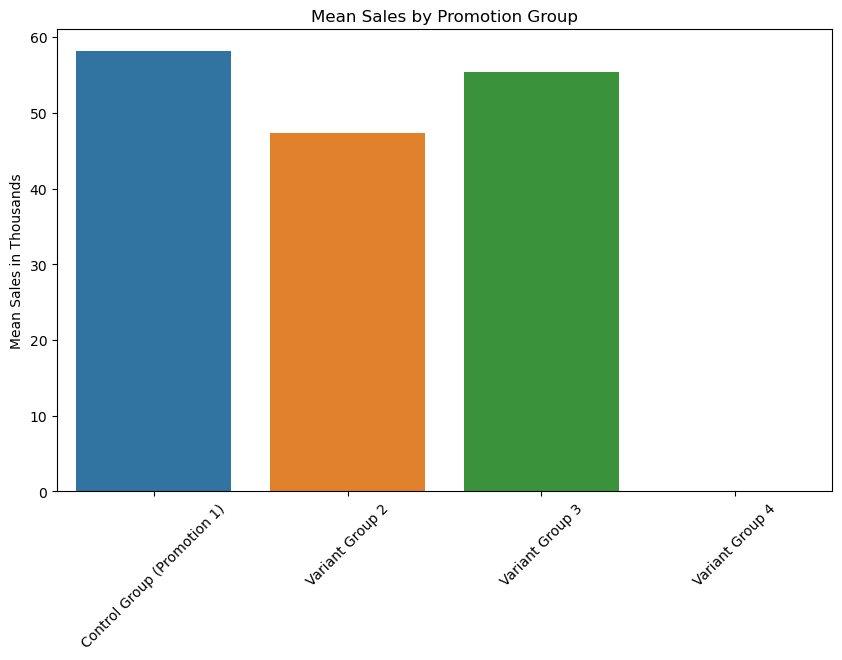

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Assuming df is your DataFrame with the provided data
control_group = df[df['Promotion'] == 1]['SalesInThousands']
variant_group_2 = df[df['Promotion'] == 2]['SalesInThousands']
variant_group_3 = df[df['Promotion'] == 3]['SalesInThousands']
variant_group_4 = df[df['Promotion'] == 4]['SalesInThousands']

# Combine variant groups into one DataFrame
variant_group = df[df['Promotion'].isin([2, 3, 4])]['SalesInThousands']

# Perform t-test
t_stat, p_value = stats.ttest_ind(control_group, variant_group)
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Check if we reject the null hypothesis
alpha = 0.05
reject_null = p_value < alpha
print(f"Reject null hypothesis: {reject_null}")

# Calculate mean sales for each group
mean_control = control_group.mean()
mean_variant_2 = variant_group_2.mean()
mean_variant_3 = variant_group_3.mean()
mean_variant_4 = variant_group_4.mean()

print(f"Mean sales for Control Group: {mean_control}")
print(f"Mean sales for Variant Group 2: {mean_variant_2}")
print(f"Mean sales for Variant Group 3: {mean_variant_3}")
print(f"Mean sales for Variant Group 4: {mean_variant_4}")

# Visualization
plt.figure(figsize=(10, 6))
sns.boxplot(x='Promotion', y='SalesInThousands', data=df)
plt.title('Sales in Thousands by Promotion')
plt.show()

# Bar plot for means
means = {
    'Control Group (Promotion 1)': mean_control,
    'Variant Group 2': mean_variant_2,
    'Variant Group 3': mean_variant_3,
    'Variant Group 4': mean_variant_4
}

plt.figure(figsize=(10, 6))
sns.barplot(x=list(means.keys()), y=list(means.values()))
plt.ylabel('Mean Sales in Thousands')
plt.title('Mean Sales by Promotion Group')
plt.xticks(rotation=45)
plt.show()
